In [1]:
import torch
import torchvision
import numpy as np
import gzip

In [2]:
def read_data():
    files = [
        'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
        't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]
    paths = []
    for i in range(len(files)):
        paths.append('../dataset/fashion-mnist/' + files[i])

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
            imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = read_data()

x_train = x_train[0]
y_train = y_train[0]

avg = np.average(x_train)
sqrt = np.sqrt(np.var(x_train))
x_train = (x_train - avg) / sqrt

x_dim, y_dim = x_train.shape  # 1, 28, 28
c = 1
m = 1
x_train = x_train.reshape(1, c, x_dim, y_dim).astype(np.float64)
y_train = y_train.reshape(1, m).astype(np.float64)

In [4]:
x_train = torch.FloatTensor(x_train)

In [5]:
y_train = torch.FloatTensor(y_train)

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16,
                               kernel_size=3, stride=1, padding=0, bias=False)

    def forward(self, x):
        return self.conv1(x)

In [11]:
a = Model()

In [12]:
ans = a.forward(x_train)

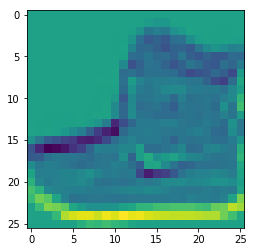

In [18]:
import matplotlib.pyplot as plt
plt.imshow(ans.detach().numpy()[0,1])
plt.show()

In [66]:
a = np.arange(100).reshape(2,2,5,5)

In [68]:
a

array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24]],

        [[25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]]],


       [[[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74]],

        [[75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84],
         [85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94],
         [95, 96, 97, 98, 99]]]])

In [73]:
b = a.reshape(2, 2 * 5 * 5)

In [76]:
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
        82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
        98, 99]])

In [85]:
def idx_four2two(idx, shape):
    """
    This function transform a 4d index (n, channel, x, y) to a 1d number,
    with accordance to np.reshape()

    :param idx:     the index
    :param shape:   the input_tensor shape [n, max_channel, max_x, max_y]
    :return:
    """
    new_idx = idx[1] * np.prod(shape[2:]) + idx[2] * shape[3] + idx[3]
    return (idx[0], new_idx)

In [92]:
coord = (1,1,3,0)

b[idx_four2two(coord, a.shape)] == a[coord]

True

In [93]:
def idx_three2one(idx, shape):
    new_idx = idx[0] * np.prod(shape[1:]) + idx[1] * shape[2] + idx[2]
    return new_idx

In [102]:
c = np.arange(100).reshape(2,5,10)
d = c.reshape(2*5*10)

In [104]:
coord = (1,1,3)

d[idx_three2one(coord, c.shape)] == c[coord]

True

In [105]:
a

array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24]],

        [[25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]]],


       [[[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74]],

        [[75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84],
         [85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94],
         [95, 96, 97, 98, 99]]]])

In [106]:
a.reshape(2, 10)

ValueError: cannot reshape array of size 100 into shape (2,10)

In [23]:
p = np.arange(100).reshape(2,2,5,5)
q = np.arange(50).reshape(5,10)

In [27]:
np.matmul(p,q).shape

(2, 2, 5, 10)